# DMS Vs BLI

DMS Vs BLI

In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
outdir = "output/DMS-Vs-BLI"

In [3]:
dms_df = pd.read_csv("https://media.githubusercontent.com/media/jbloomlab/Ab-CGGnaive_DMS/improved-Kd-fitting/tite-seq-modeling/output/final_variant_scores.csv", index_col="mutation", dtype=dict(position_IMGT=pd.Int16Dtype()))
dms_df

,target,wildtype,position,position_IMGT,chain,annotation,mutant,codon,single_nt,bind_CGG_old,...,expr,delta_expr,n_bc_expr,n_libs_expr,psr,delta_psr,n_bc_psr,n_libs_psr,bind_CGG,delta_bind_CGG
mutation,,,,,,,,,,,,,,,,,,,,,
E1(H)A,CGG_naive,E,1,1,H,FWRH1,A,GAG,True,10.48829,...,10.44614,-0.00453,19.0,2.0,6.78608,-0.07452,17.0,2.0,8.743405,0.118714
E1(H)C,CGG_naive,E,1,1,H,FWRH1,C,GAG,False,10.44477,...,10.32364,-0.12703,20.0,2.0,7.44234,0.58174,17.0,2.0,8.608719,-0.015972
E1(H)D,CGG_naive,E,1,1,H,FWRH1,D,GAG,True,10.42771,...,10.51618,0.06551,16.0,2.0,6.95940,0.09880,13.0,2.0,8.636243,0.011552
E1(H)E,CGG_naive,E,1,1,H,FWRH1,E,GAG,True,10.45719,...,10.45067,0.00000,21170.0,2.0,6.86060,0.00000,18910.0,2.0,NaN,NaN
E1(H)F,CGG_naive,E,1,1,H,FWRH1,F,GAG,False,10.51899,...,10.33163,-0.11904,24.0,2.0,6.91372,0.05313,21.0,2.0,8.758318,0.133627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NANA(link)S,CGG_naive,NaN,121,<NA>,link,NaN,S,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NANA(link)T,CGG_naive,NaN,121,<NA>,link,NaN,T,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NANA(link)V,CGG_naive,NaN,121,<NA>,link,NaN,V,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pos_df = pd.read_csv("https://raw.githubusercontent.com/jbloomlab/Ab-CGGnaive_DMS/main/data/CGGnaive_sites.csv", dtype=dict(site=pd.Int16Dtype()), index_col="site_scFv")
pos_df

,amino_acid,chain,site,KI_codon,annotation
site_scFv,,,,,
1,E,H,1,GAG,FWRH1
2,V,H,2,GTG,FWRH1
3,Q,H,3,CAG,FWRH1
4,L,H,4,CTT,FWRH1
5,Q,H,5,CAG,FWRH1
...,...,...,...,...,...
231,L,L,124,CTA,FWRL4
232,E,L,125,GAA,FWRL4
233,I,L,126,ATA,FWRL4


## BLI/octet data

Tatsuya's IMGT positions (which differ from Fab and PDB)

In [5]:
ta_pos = pd.read_excel("data/BLI/TatsuyaIMGTPosition.xlsx", dtype=dict(position_IMGT=pd.Int16Dtype()))

assert all(ta_pos.position == pos_df.index)
assert all(ta_pos.position == ta_pos.position.astype(int))
pos_df["site_tatsuya"] = ta_pos.position_IMGT.values
pos_df

,amino_acid,chain,site,KI_codon,annotation,site_tatsuya
site_scFv,,,,,,
1,E,H,1,GAG,FWRH1,1
2,V,H,2,GTG,FWRH1,2
3,Q,H,3,CAG,FWRH1,3
4,L,H,4,CTT,FWRH1,4
5,Q,H,5,CAG,FWRH1,5
...,...,...,...,...,...,...
231,L,L,124,CTA,FWRL4,120
232,E,L,125,GAA,FWRL4,121
233,I,L,126,ATA,FWRL4,122


/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/wsdewitt/miniconda3/envs/replay/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


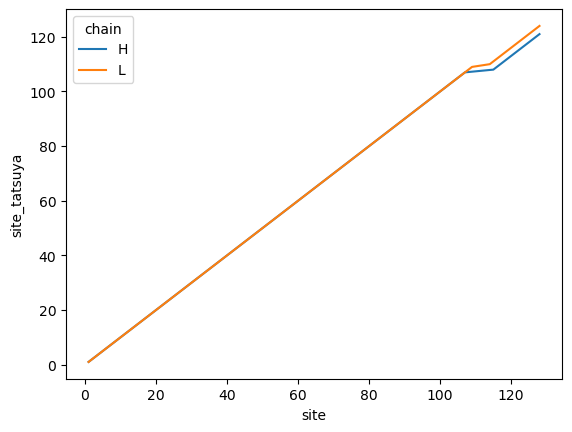

In [6]:
sns.lineplot(data=pos_df.query("chain != 'link'"), x="site", y="site_tatsuya", hue="chain")
plt.show()

In [7]:
bli_df = pd.read_excel("data/BLI/OctetvsDMSSummary.xlsx")
bli_df.columns = bli_df.columns.str.strip()
bli_df.fillna("GL", inplace=True)

# change L112(L) mutations to L116(L) to match IMGT numbering in Tyler's data
bli_df["IgK mutations"] = bli_df["IgK mutations"].str.replace("L112(L)", "L116(L)")

bli_df

,Sample,Info,BLI KD,BLI delta KD,DMS KD,IgH mutations,IgK mutations
0,6,Uniform ladder,3.915000e-06,-2.800971,-1.41357,"S57(H)N,Y102(H)H,T115(H)S","T37(L)I,L116(L)P"
1,7,Uniform ladder,6.649000e-10,0.969004,1.50696,"D28(H)A,T35(H)A,N40(H)S,Y67(H)F,S74(H)G","Y66(L)H,F103(L)I,N108(L)K"
2,9,Uniform ladder,1.000000e-12,3.791761,2.70218,"D28(H)V,S59(H)T,I76(H)F,Q86(H)H,A105(H)G","F10(L)L,Q105(L)H,N108(L)K,S109(L)I,L116(L)I,E1..."
3,11,"""elbow""",6.610000e-10,1.018656,-0.67113,GL,"E97(L)D,Q106(L)H,L116(L)P"
4,12,"""elbow""",6.950000e-10,0.996550,-1.99783,"D28(H)A,S57(H)N,S59(H)N,I78(H)L",N108(L)K
5,13,"""elbow""",2.120000e-07,-1.488085,-1.04789,Y87(H)H,V39(L)I
6,15,Burst: LBI #1,1.110000e-10,1.795298,0.53801,GL,"R67(L)K,Q105(L)H,L116(L)I"
7,16,Burst: LBI #2,9.660000e-09,-0.146362,0.69114,"S64(H)T,N92(H)K","Y42(L)C,N108(L)H"
8,17,Burst: LBI #3,6.987000e-09,0.517437,0.01387,"I78(H)L,N92(H)T",Y42(L)C
9,18,Burst: LBI #4,9.019000e-09,0.399910,0.09213,GL,"Y42(L)N,L99(L)V,L120(L)V"


In [8]:
octet_df = pd.read_csv("data/octet/octet_data.csv")
octet_df.columns = octet_df.columns.str.strip()
octet_df

,ID,HCmut,LCmut,aa_mut_total,deltaKd_additive_foldchange,deltaKd_additive,octet_Kd_foldchange_avg,kd,kon,kdis,R^2
0,#26 Fab4,"K49R, Y58F",A40G,3,7.462082,0.87286,6.364276,2.840000e-09,126300,0.000359,0.9993
1,A40G,GL,A40G,1,7.172326,0.85566,6.952912,4.210000e-09,90900,0.000383,0.9997
2,A40V,GL,A40V,1,0.193201,-0.71399,0.642593,5.400000e-08,142000,0.007670,0.9746
3,"A40V, N108D",GL,"A40V, N108D",2,0.031422,-1.50277,0.376934,7.110000e-08,111000,0.007920,0.9266
4,D28A,D28A,GL,1,6.835810,0.83479,5.774278,3.810000e-09,225000,0.000858,0.9944
5,EH1,"D28A, K44R, S64G","A40G, Y42F, A52S, Q105H, N108Y",8,2558.998315,3.40807,308.192458,7.690000e-11,933000,0.000072,0.9919
6,EH2,"D28A, K49R, S64G","A40G, Y42F, A52S, Q105H, N108Y",8,2154.269337,3.33330,383.495146,6.180000e-11,1030000,0.000063,0.9947
7,EH3,"D28A, K44R, K49R, S64G","A40G, Y42F, A52S, Q105H, N108Y",9,2499.769702,3.39790,361.280488,6.560000e-11,1050000,0.000069,0.9900
8,GL,GL,GL,0,1.000000,0.00000,1.000000,2.600000e-08,86700,0.002260,0.9900
9,K44R,K44R,GL,1,1.160379,0.06460,0.986547,2.230000e-08,152000,0.003400,0.9950


In [9]:
def mut_formatter(muts, chain):
    if muts == "GL":
        return muts
    muts = muts.replace(", ", ",").replace(" ", ",")
    return ",".join(f"{mut[0]}{int(mut[1:-1])}({chain}){mut[-1]}" for mut in muts.split(","))

octet_df.HCmut = octet_df.HCmut.map(lambda x: mut_formatter(x, "H"))
octet_df.LCmut = octet_df.LCmut.map(lambda x: mut_formatter(x, "L"))

In [10]:
octet_df["log10Kd_octet"] = np.log10(octet_df["kd"])

In [11]:
dms_df

,target,wildtype,position,position_IMGT,chain,annotation,mutant,codon,single_nt,bind_CGG_old,...,expr,delta_expr,n_bc_expr,n_libs_expr,psr,delta_psr,n_bc_psr,n_libs_psr,bind_CGG,delta_bind_CGG
mutation,,,,,,,,,,,,,,,,,,,,,
E1(H)A,CGG_naive,E,1,1,H,FWRH1,A,GAG,True,10.48829,...,10.44614,-0.00453,19.0,2.0,6.78608,-0.07452,17.0,2.0,8.743405,0.118714
E1(H)C,CGG_naive,E,1,1,H,FWRH1,C,GAG,False,10.44477,...,10.32364,-0.12703,20.0,2.0,7.44234,0.58174,17.0,2.0,8.608719,-0.015972
E1(H)D,CGG_naive,E,1,1,H,FWRH1,D,GAG,True,10.42771,...,10.51618,0.06551,16.0,2.0,6.95940,0.09880,13.0,2.0,8.636243,0.011552
E1(H)E,CGG_naive,E,1,1,H,FWRH1,E,GAG,True,10.45719,...,10.45067,0.00000,21170.0,2.0,6.86060,0.00000,18910.0,2.0,NaN,NaN
E1(H)F,CGG_naive,E,1,1,H,FWRH1,F,GAG,False,10.51899,...,10.33163,-0.11904,24.0,2.0,6.91372,0.05313,21.0,2.0,8.758318,0.133627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NANA(link)S,CGG_naive,NaN,121,<NA>,link,NaN,S,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NANA(link)T,CGG_naive,NaN,121,<NA>,link,NaN,T,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NANA(link)V,CGG_naive,NaN,121,<NA>,link,NaN,V,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# There is an issue with the `bind_CGG` values in `dms_df`

In [12]:
dms_df.query("mutant == wildtype")

,target,wildtype,position,position_IMGT,chain,annotation,mutant,codon,single_nt,bind_CGG_old,...,expr,delta_expr,n_bc_expr,n_libs_expr,psr,delta_psr,n_bc_psr,n_libs_psr,bind_CGG,delta_bind_CGG
mutation,,,,,,,,,,,,,,,,,,,,,
E1(H)E,CGG_naive,E,1,1,H,FWRH1,E,GAG,True,10.45719,...,10.45067,0.0,21170.0,2.0,6.8606,0.0,18910.0,2.0,NaN,NaN
V2(H)V,CGG_naive,V,2,2,H,FWRH1,V,GTG,True,10.45719,...,10.45067,0.0,21170.0,2.0,6.8606,0.0,18910.0,2.0,NaN,NaN
Q3(H)Q,CGG_naive,Q,3,3,H,FWRH1,Q,CAG,True,10.45719,...,10.45067,0.0,21170.0,2.0,6.8606,0.0,18910.0,2.0,NaN,NaN
L4(H)L,CGG_naive,L,4,4,H,FWRH1,L,CTT,True,10.45719,...,10.45067,0.0,21170.0,2.0,6.8606,0.0,18910.0,2.0,NaN,NaN
Q5(H)Q,CGG_naive,Q,5,5,H,FWRH1,Q,CAG,True,10.45719,...,10.45067,0.0,21170.0,2.0,6.8606,0.0,18910.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L124(L)L,CGG_naive,L,231,124,L,FWRL4,L,CTA,True,10.45719,...,10.45067,0.0,21170.0,2.0,6.8606,0.0,18910.0,2.0,NaN,NaN
E125(L)E,CGG_naive,E,232,125,L,FWRL4,E,GAA,True,10.45719,...,10.45067,0.0,21170.0,2.0,6.8606,0.0,18910.0,2.0,NaN,NaN
I126(L)I,CGG_naive,I,233,126,L,FWRL4,I,ATA,True,10.45719,...,10.45067,0.0,21170.0,2.0,6.8606,0.0,18910.0,2.0,NaN,NaN


In [13]:
(dms_df.delta_bind_CGG - dms_df.bind_CGG).value_counts()

-8.624691    2475
-8.624691    1665
-8.646900      13
-8.602483      12
-8.624691       8
-8.624691       4
Name: count, dtype: int64

In [14]:
# NOTE: above should be similar...
log10Kd_wt = (dms_df.delta_bind_CGG - dms_df.bind_CGG).mean()
log10Kd_wt

-8.62469670235037

In [15]:
def log10Kd_predict(row, IGH_colname, IGK_colname):
    result = log10Kd_wt
    for mut in row[IGH_colname].split(",") + row[IGK_colname].split(","):
        if mut != "GL":
            matches = dms_df.index == mut
            if sum(matches) == 0:
                print(f"no matches for {mut}")
            result -= dms_df.loc[matches].delta_bind_CGG.mean()
    return result

In [16]:
bli_df["log10Kd_dms"] = bli_df.apply(log10Kd_predict, args=("IgH mutations", "IgK mutations"), axis=1)
bli_df

no matches for T115(H)S
no matches for E121(L)D
no matches for L120(L)V


,Sample,Info,BLI KD,BLI delta KD,DMS KD,IgH mutations,IgK mutations,log10Kd_dms
0,6,Uniform ladder,3.915000e-06,-2.800971,-1.41357,"S57(H)N,Y102(H)H,T115(H)S","T37(L)I,L116(L)P",NaN
1,7,Uniform ladder,6.649000e-10,0.969004,1.50696,"D28(H)A,T35(H)A,N40(H)S,Y67(H)F,S74(H)G","Y66(L)H,F103(L)I,N108(L)K",-10.338315
2,9,Uniform ladder,1.000000e-12,3.791761,2.70218,"D28(H)V,S59(H)T,I76(H)F,Q86(H)H,A105(H)G","F10(L)L,Q105(L)H,N108(L)K,S109(L)I,L116(L)I,E1...",NaN
3,11,"""elbow""",6.610000e-10,1.018656,-0.67113,GL,"E97(L)D,Q106(L)H,L116(L)P",-8.033120
4,12,"""elbow""",6.950000e-10,0.996550,-1.99783,"D28(H)A,S57(H)N,S59(H)N,I78(H)L",N108(L)K,-8.350769
5,13,"""elbow""",2.120000e-07,-1.488085,-1.04789,Y87(H)H,V39(L)I,-7.954112
6,15,Burst: LBI #1,1.110000e-10,1.795298,0.53801,GL,"R67(L)K,Q105(L)H,L116(L)I",-9.612686
7,16,Burst: LBI #2,9.660000e-09,-0.146362,0.69114,"S64(H)T,N92(H)K","Y42(L)C,N108(L)H",-9.579794
8,17,Burst: LBI #3,6.987000e-09,0.517437,0.01387,"I78(H)L,N92(H)T",Y42(L)C,-8.972852
9,18,Burst: LBI #4,9.019000e-09,0.399910,0.09213,GL,"Y42(L)N,L99(L)V,L120(L)V",NaN


In [17]:
octet_df["log10Kd_dms"] = octet_df.apply(log10Kd_predict, args=("HCmut", "LCmut"), axis=1)
octet_df

,ID,HCmut,LCmut,aa_mut_total,deltaKd_additive_foldchange,deltaKd_additive,octet_Kd_foldchange_avg,kd,kon,kdis,R^2,log10Kd_octet,log10Kd_dms
0,#26 Fab4,"K49(H)R,Y58(H)F",A40(L)G,3,7.462082,0.87286,6.364276,2.840000e-09,126300,0.000359,0.9993,-8.546682,-9.636397
1,A40G,GL,A40(L)G,1,7.172326,0.85566,6.952912,4.210000e-09,90900,0.000383,0.9997,-8.375718,-9.428584
2,A40V,GL,A40(L)V,1,0.193201,-0.71399,0.642593,5.400000e-08,142000,0.007670,0.9746,-7.267606,-7.909866
3,"A40V, N108D",GL,"A40(L)V,N108(L)D",2,0.031422,-1.50277,0.376934,7.110000e-08,111000,0.007920,0.9266,-7.148130,-7.279953
4,D28A,D28(H)A,GL,1,6.835810,0.83479,5.774278,3.810000e-09,225000,0.000858,0.9944,-8.419075,-9.483367
5,EH1,"D28(H)A,K44(H)R,S64(H)G","A40(L)G,Y42(L)F,A52(L)S,Q105(L)H,N108(L)Y",8,2558.998315,3.40807,308.192458,7.690000e-11,933000,0.000072,0.9919,-10.114074,-12.206961
6,EH2,"D28(H)A,K49(H)R,S64(H)G","A40(L)G,Y42(L)F,A52(L)S,Q105(L)H,N108(L)Y",8,2154.269337,3.33330,383.495146,6.180000e-11,1030000,0.000063,0.9947,-10.209012,-12.135765
7,EH3,"D28(H)A,K44(H)R,K49(H)R,S64(H)G","A40(L)G,Y42(L)F,A52(L)S,Q105(L)H,N108(L)Y",9,2499.769702,3.39790,361.280488,6.560000e-11,1050000,0.000069,0.9900,-10.183096,-12.292692
8,GL,GL,GL,0,1.000000,0.00000,1.000000,2.600000e-08,86700,0.002260,0.9900,-7.585027,-8.624697
9,K44R,K44(H)R,GL,1,1.160379,0.06460,0.986547,2.230000e-08,152000,0.003400,0.9950,-7.651695,-8.781624


In [18]:
dms_df_old = pd.read_csv("https://media.githubusercontent.com/media/jbloomlab/Ab-CGGnaive_DMS/main/results/final_variant_scores/final_variant_scores.csv", index_col="mutation", dtype=dict(position_IMGT=pd.Int16Dtype()))
dms_df_old.query("chain != 'link'", inplace=True)
dms_df_old

,target,wildtype,position,position_IMGT,chain,annotation,mutant,codon,single_nt,bind_CGG,...,n_bc_bind_TuGG,n_libs_bind_TuGG,expr,delta_expr,n_bc_expr,n_libs_expr,psr,delta_psr,n_bc_psr,n_libs_psr
mutation,,,,,,,,,,,,,,,,,,,,,
E1(H)A,CGG_naive,E,1,1,H,FWRH1,A,GAG,True,10.48829,...,19.0,2.0,10.44614,-0.00453,19.0,2.0,6.78608,-0.07452,17.0,2.0
E1(H)C,CGG_naive,E,1,1,H,FWRH1,C,GAG,False,10.44477,...,19.0,2.0,10.32364,-0.12703,20.0,2.0,7.44234,0.58174,17.0,2.0
E1(H)D,CGG_naive,E,1,1,H,FWRH1,D,GAG,True,10.42771,...,15.0,2.0,10.51618,0.06551,16.0,2.0,6.95940,0.09880,13.0,2.0
E1(H)E,CGG_naive,E,1,1,H,FWRH1,E,GAG,True,10.45719,...,20086.0,2.0,10.45067,0.00000,21170.0,2.0,6.86060,0.00000,18910.0,2.0
E1(H)F,CGG_naive,E,1,1,H,FWRH1,F,GAG,False,10.51899,...,24.0,2.0,10.33163,-0.11904,24.0,2.0,6.91372,0.05313,21.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R128(L)S,CGG_naive,R,235,128,L,FWRL4,S,CGT,True,10.44756,...,36.0,2.0,10.54313,0.09246,39.0,2.0,6.93925,0.07866,33.0,2.0
R128(L)T,CGG_naive,R,235,128,L,FWRL4,T,CGT,False,10.43023,...,32.0,2.0,10.53860,0.08793,36.0,2.0,6.88956,0.02896,34.0,2.0
R128(L)V,CGG_naive,R,235,128,L,FWRL4,V,CGT,False,10.38231,...,28.0,2.0,10.48707,0.03640,27.0,2.0,6.78160,-0.07899,24.0,2.0


In [19]:
# idxs = (variant_params_df.variant_type == '1 missense') & ~variant_params_df.variant_imgt.str.contains("link")
# variant_params_df.loc[idxs, "log10Kd_OLD"] = -dms_df.bind_CGG[variant_params_df.loc[idxs, "variant_imgt"].values].values
# variant_params_df

# g = sns.jointplot(data=variant_params_df,
#              x="log10Kd_OLD",
#              y="log10Kd",
#              kind="hist",
#             #  s=5,
# )
# g.ax_joint.plot([-12, -6], [-12, -6], color="gray", ls="--")
# plt.show()

In [20]:
def log10Kd_predict_old(row, IGH_colname, IGK_colname):
    result = -dms_df_old.query("wildtype == mutant").bind_CGG.mean()
    for mut in row[IGH_colname].split(",") + row[IGK_colname].split(","):
        if mut != "GL":
            result -= dms_df_old.query(f"index == '{mut}'").delta_bind_CGG.mean()
    return result

In [21]:
octet_df["log10Kd_dms_old"] = octet_df.apply(log10Kd_predict_old, axis=1, args=("HCmut", "LCmut"))
octet_df

,ID,HCmut,LCmut,aa_mut_total,deltaKd_additive_foldchange,deltaKd_additive,octet_Kd_foldchange_avg,kd,kon,kdis,R^2,log10Kd_octet,log10Kd_dms,log10Kd_dms_old
0,#26 Fab4,"K49(H)R,Y58(H)F",A40(L)G,3,7.462082,0.87286,6.364276,2.840000e-09,126300,0.000359,0.9993,-8.546682,-9.636397,-11.33005
1,A40G,GL,A40(L)G,1,7.172326,0.85566,6.952912,4.210000e-09,90900,0.000383,0.9997,-8.375718,-9.428584,-11.31285
2,A40V,GL,A40(L)V,1,0.193201,-0.71399,0.642593,5.400000e-08,142000,0.007670,0.9746,-7.267606,-7.909866,-9.74320
3,"A40V, N108D",GL,"A40(L)V,N108(L)D",2,0.031422,-1.50277,0.376934,7.110000e-08,111000,0.007920,0.9266,-7.148130,-7.279953,-8.95442
4,D28A,D28(H)A,GL,1,6.835810,0.83479,5.774278,3.810000e-09,225000,0.000858,0.9944,-8.419075,-9.483367,-11.29198
5,EH1,"D28(H)A,K44(H)R,S64(H)G","A40(L)G,Y42(L)F,A52(L)S,Q105(L)H,N108(L)Y",8,2558.998315,3.40807,308.192458,7.690000e-11,933000,0.000072,0.9919,-10.114074,-12.206961,-13.86526
6,EH2,"D28(H)A,K49(H)R,S64(H)G","A40(L)G,Y42(L)F,A52(L)S,Q105(L)H,N108(L)Y",8,2154.269337,3.33330,383.495146,6.180000e-11,1030000,0.000063,0.9947,-10.209012,-12.135765,-13.79049
7,EH3,"D28(H)A,K44(H)R,K49(H)R,S64(H)G","A40(L)G,Y42(L)F,A52(L)S,Q105(L)H,N108(L)Y",9,2499.769702,3.39790,361.280488,6.560000e-11,1050000,0.000069,0.9900,-10.183096,-12.292692,-13.85509
8,GL,GL,GL,0,1.000000,0.00000,1.000000,2.600000e-08,86700,0.002260,0.9900,-7.585027,-8.624697,-10.45719
9,K44R,K44(H)R,GL,1,1.160379,0.06460,0.986547,2.230000e-08,152000,0.003400,0.9950,-7.651695,-8.781624,-10.52179


In [22]:
bli_df["log10Kd_dms_old"] = bli_df.apply(log10Kd_predict_old, axis=1, args=("IgH mutations", "IgK mutations"))
bli_df

,Sample,Info,BLI KD,BLI delta KD,DMS KD,IgH mutations,IgK mutations,log10Kd_dms,log10Kd_dms_old
0,6,Uniform ladder,3.915000e-06,-2.800971,-1.41357,"S57(H)N,Y102(H)H,T115(H)S","T37(L)I,L116(L)P",NaN,NaN
1,7,Uniform ladder,6.649000e-10,0.969004,1.50696,"D28(H)A,T35(H)A,N40(H)S,Y67(H)F,S74(H)G","Y66(L)H,F103(L)I,N108(L)K",-10.338315,-11.96415
2,9,Uniform ladder,1.000000e-12,3.791761,2.70218,"D28(H)V,S59(H)T,I76(H)F,Q86(H)H,A105(H)G","F10(L)L,Q105(L)H,N108(L)K,S109(L)I,L116(L)I,E1...",NaN,NaN
3,11,"""elbow""",6.610000e-10,1.018656,-0.67113,GL,"E97(L)D,Q106(L)H,L116(L)P",-8.033120,-9.78606
4,12,"""elbow""",6.950000e-10,0.996550,-1.99783,"D28(H)A,S57(H)N,S59(H)N,I78(H)L",N108(L)K,-8.350769,-8.45936
5,13,"""elbow""",2.120000e-07,-1.488085,-1.04789,Y87(H)H,V39(L)I,-7.954112,-9.40930
6,15,Burst: LBI #1,1.110000e-10,1.795298,0.53801,GL,"R67(L)K,Q105(L)H,L116(L)I",-9.612686,-10.99520
7,16,Burst: LBI #2,9.660000e-09,-0.146362,0.69114,"S64(H)T,N92(H)K","Y42(L)C,N108(L)H",-9.579794,-11.14833
8,17,Burst: LBI #3,6.987000e-09,0.517437,0.01387,"I78(H)L,N92(H)T",Y42(L)C,-8.972852,-10.47106
9,18,Burst: LBI #4,9.019000e-09,0.399910,0.09213,GL,"Y42(L)N,L99(L)V,L120(L)V",NaN,NaN


## New Vs old model for Tatsuya's Octet data

In [23]:
gl_row = octet_df.query("ID == 'GL'")

gl_octet = gl_row.log10Kd_octet.squeeze()
gl_dms_new = gl_row.log10Kd_dms.squeeze()
gl_dms_old = gl_row.log10Kd_dms_old.squeeze()

gl_octet, gl_dms_new, gl_dms_old

(-7.585026652029182, -8.62469670235037, -10.457189999999999)

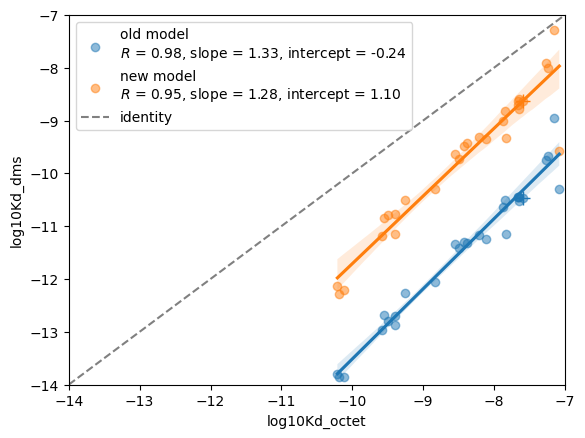

In [24]:
linreg_old = scipy.stats.linregress(octet_df.log10Kd_octet, octet_df.log10Kd_dms_old)
sns.regplot(data=octet_df,
            x="log10Kd_octet",
            y="log10Kd_dms_old",
            scatter_kws=dict(alpha=0.5),
            label=f"old model\n$R$ = {linreg_old.rvalue:.2f}, slope = {linreg_old.slope:.2f}, intercept = {linreg_old.intercept:.2f}",
            )
plt.plot([gl_octet], [gl_dms_old], marker="+", markersize=10, c="C0")
linreg = scipy.stats.linregress(octet_df.log10Kd_octet, octet_df.log10Kd_dms)
sns.regplot(data=octet_df,
            x="log10Kd_octet",
            y="log10Kd_dms",
            scatter_kws=dict(alpha=0.5),
            label=f"new model\n$R$ = {linreg.rvalue:.2f}, slope = {linreg.slope:.2f}, intercept = {linreg.intercept:.2f}",
            )
plt.plot([gl_octet], [gl_dms_new], marker="+", markersize=10, c="C1")
plt.plot([-14, -7], [-14, -7], color="gray", ls="--", label="identity")
plt.legend()
plt.xlim(-14, -7)
plt.ylim(-14, -7)
plt.show()

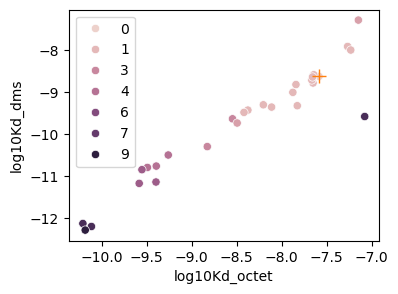

In [25]:
plt.figure(figsize=(4, 3))
sns.scatterplot(data=octet_df,
            x="log10Kd_octet",
            y="log10Kd_dms",
            hue="aa_mut_total",
            )
plt.plot([gl_octet], [gl_dms_new], marker="+", markersize=10, c="C1")
# plt.plot([-14, -7], [-14, -7], color="gray", ls="--", label="identity")
plt.legend()
# plt.xlim(-14, -7)
# plt.ylim(-14, -7)
plt.show()

In [26]:
octet_df

,ID,HCmut,LCmut,aa_mut_total,deltaKd_additive_foldchange,deltaKd_additive,octet_Kd_foldchange_avg,kd,kon,kdis,R^2,log10Kd_octet,log10Kd_dms,log10Kd_dms_old
0,#26 Fab4,"K49(H)R,Y58(H)F",A40(L)G,3,7.462082,0.87286,6.364276,2.840000e-09,126300,0.000359,0.9993,-8.546682,-9.636397,-11.33005
1,A40G,GL,A40(L)G,1,7.172326,0.85566,6.952912,4.210000e-09,90900,0.000383,0.9997,-8.375718,-9.428584,-11.31285
2,A40V,GL,A40(L)V,1,0.193201,-0.71399,0.642593,5.400000e-08,142000,0.007670,0.9746,-7.267606,-7.909866,-9.74320
3,"A40V, N108D",GL,"A40(L)V,N108(L)D",2,0.031422,-1.50277,0.376934,7.110000e-08,111000,0.007920,0.9266,-7.148130,-7.279953,-8.95442
4,D28A,D28(H)A,GL,1,6.835810,0.83479,5.774278,3.810000e-09,225000,0.000858,0.9944,-8.419075,-9.483367,-11.29198
5,EH1,"D28(H)A,K44(H)R,S64(H)G","A40(L)G,Y42(L)F,A52(L)S,Q105(L)H,N108(L)Y",8,2558.998315,3.40807,308.192458,7.690000e-11,933000,0.000072,0.9919,-10.114074,-12.206961,-13.86526
6,EH2,"D28(H)A,K49(H)R,S64(H)G","A40(L)G,Y42(L)F,A52(L)S,Q105(L)H,N108(L)Y",8,2154.269337,3.33330,383.495146,6.180000e-11,1030000,0.000063,0.9947,-10.209012,-12.135765,-13.79049
7,EH3,"D28(H)A,K44(H)R,K49(H)R,S64(H)G","A40(L)G,Y42(L)F,A52(L)S,Q105(L)H,N108(L)Y",9,2499.769702,3.39790,361.280488,6.560000e-11,1050000,0.000069,0.9900,-10.183096,-12.292692,-13.85509
8,GL,GL,GL,0,1.000000,0.00000,1.000000,2.600000e-08,86700,0.002260,0.9900,-7.585027,-8.624697,-10.45719
9,K44R,K44(H)R,GL,1,1.160379,0.06460,0.986547,2.230000e-08,152000,0.003400,0.9950,-7.651695,-8.781624,-10.52179


In [27]:
octet_df.to_csv(f"{outdir}/octet.csv", index=False)

## New Vs old model for Ashni's BLI data

- Some positions don't match! These are NaNs
- I am using the GL affinity from Tatsuya's data, since it's not in this file

In [28]:
bli_df["log10Kd_octet"] = gl_octet - bli_df["BLI KD"]

bli_df

,Sample,Info,BLI KD,BLI delta KD,DMS KD,IgH mutations,IgK mutations,log10Kd_dms,log10Kd_dms_old,log10Kd_octet
0,6,Uniform ladder,3.915000e-06,-2.800971,-1.41357,"S57(H)N,Y102(H)H,T115(H)S","T37(L)I,L116(L)P",NaN,NaN,-7.585031
1,7,Uniform ladder,6.649000e-10,0.969004,1.50696,"D28(H)A,T35(H)A,N40(H)S,Y67(H)F,S74(H)G","Y66(L)H,F103(L)I,N108(L)K",-10.338315,-11.96415,-7.585027
2,9,Uniform ladder,1.000000e-12,3.791761,2.70218,"D28(H)V,S59(H)T,I76(H)F,Q86(H)H,A105(H)G","F10(L)L,Q105(L)H,N108(L)K,S109(L)I,L116(L)I,E1...",NaN,NaN,-7.585027
3,11,"""elbow""",6.610000e-10,1.018656,-0.67113,GL,"E97(L)D,Q106(L)H,L116(L)P",-8.033120,-9.78606,-7.585027
4,12,"""elbow""",6.950000e-10,0.996550,-1.99783,"D28(H)A,S57(H)N,S59(H)N,I78(H)L",N108(L)K,-8.350769,-8.45936,-7.585027
5,13,"""elbow""",2.120000e-07,-1.488085,-1.04789,Y87(H)H,V39(L)I,-7.954112,-9.40930,-7.585027
6,15,Burst: LBI #1,1.110000e-10,1.795298,0.53801,GL,"R67(L)K,Q105(L)H,L116(L)I",-9.612686,-10.99520,-7.585027
7,16,Burst: LBI #2,9.660000e-09,-0.146362,0.69114,"S64(H)T,N92(H)K","Y42(L)C,N108(L)H",-9.579794,-11.14833,-7.585027
8,17,Burst: LBI #3,6.987000e-09,0.517437,0.01387,"I78(H)L,N92(H)T",Y42(L)C,-8.972852,-10.47106,-7.585027
9,18,Burst: LBI #4,9.019000e-09,0.399910,0.09213,GL,"Y42(L)N,L99(L)V,L120(L)V",NaN,NaN,-7.585027


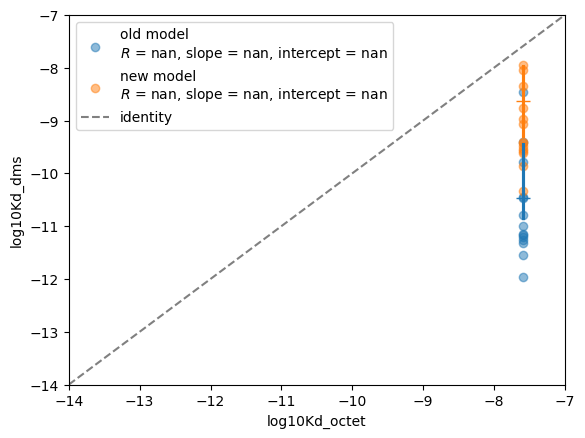

In [29]:
linreg_old = scipy.stats.linregress(bli_df.log10Kd_octet, bli_df.log10Kd_dms_old)
sns.regplot(data=bli_df,
            x="log10Kd_octet",
            y="log10Kd_dms_old",
            scatter_kws=dict(alpha=0.5),
            label=f"old model\n$R$ = {linreg_old.rvalue:.2f}, slope = {linreg_old.slope:.2f}, intercept = {linreg_old.intercept:.2f}",
            )
plt.plot([gl_octet], [gl_dms_old], marker="+", markersize=10, c="C0")
linreg = scipy.stats.linregress(bli_df.log10Kd_octet, bli_df.log10Kd_dms)
sns.regplot(data=bli_df,
            x="log10Kd_octet",
            y="log10Kd_dms",
            scatter_kws=dict(alpha=0.5),
            label=f"new model\n$R$ = {linreg.rvalue:.2f}, slope = {linreg.slope:.2f}, intercept = {linreg.intercept:.2f}",
            )
plt.plot([gl_octet], [gl_dms_new], marker="+", markersize=10, c="C1")
plt.plot([-14, -7], [-14, -7], color="gray", ls="--", label="identity")
plt.legend()
plt.xlim(-14, -7)
plt.ylim(-14, -7)
plt.show()